In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Подинтегральная функция
$$y = \frac{4}{(1 + x^2)}$$

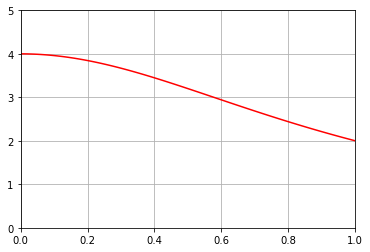

In [2]:
def integrate_func(x):
    return 4 / (1 + x ** 2)

x = np.linspace(0, 1, 100)
y = integrate_func(x)

plt.plot(x, y, color="red")
plt.xlim([0, 1])
plt.ylim([0, 5])
plt.grid()

# График функции

In [17]:
# методы
def midle_rectangle_method(func, x):
    d_x_arg = (x[:-1] + x[1:]) / 2
    d_x = x[1:] - x[:-1]
    f = func(d_x_arg)
    return (f * d_x).sum(), np.abs(np.pi - (f * d_x).sum()), (f, x[:-1])

def trapezoidal_method(func, x):
    f = func(x)
    d_f = (f[:-1] + f[1:]) / 2
    d_x = x[1:] - x[:-1]  
    return (d_f * d_x).sum(), np.abs(np.pi - (d_f * d_x).sum()), (f, x)   

def Simpson_method(func, x):
    f = func(x)
    res = (x[1] / 3)*(f[0] + (2*(f[1:-1])[1::2]).sum() + (4*(f[1:-1])[::2]).sum() + f[-1])
    x_new = np.linspace(0, 1, 1000)
    y_new = []
    i = 0
    while i < len(x) - 1:
        if i + 2 < len(x):
            lagr = lagranz_param([x[i], x[i+1], x[i+2]], [f[i], f[i+1], f[i+2]])
            for _x in x_new:
                if x[i] <= _x < x[i+2]:
                    y_new.append(lagr(_x))    
            i += 2
        else:
            x_new =np.concatenate([x_new[:len(y_new)], np.array([x_new[len(y_new)], x_new[-1]])])
            y_new.append(f[i])
            i+=1
    y_new.append(f[-1])
    return res, np.abs(np.pi - res), (y_new, x_new)

def lagranz_param(x,y):
    def lagr(t):
        z=0
        for j in range(len(y)):
            p1=1; p2=1
            for i in range(len(x)):
                if i==j:
                    p1=p1*1; p2=p2*1   
                else: 
                    p1=p1*(t-x[i])
                    p2=p2*(x[j]-x[i])
            z=z+y[j]*p1/p2
        return z
    return lagr

In [18]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

,midle_rectangle_method_eps/difference,trapezoidal_method_eps/difference,Simpson_method_eps/difference,points
0,"(0.058407, -)","(0.141593, -)","(1.141593, -)",2
1,"(0.009257, 6.31)","(0.018516, 7.65)","(0.259541, 4.40)",4
2,"(0.001701, 5.44)","(0.003401, 5.44)","(0.102040, 2.54)",8
3,"(0.000370, 4.59)","(0.000741, 4.59)","(0.045926, 2.22)",16
4,"(0.000087, 4.27)","(0.000173, 4.27)","(0.021852, 2.10)",32
5,"(0.000021, 4.13)","(0.000042, 4.13)","(0.010666, 2.05)",64
6,"(0.000005, 4.06)","(0.000010, 4.06)","(0.005270, 2.02)",128


Таблица с погрешностями


,midle_rectangle_method_res,trapezoidal_method_res,Simpson_method_res,points
0,3.200000,3.000000,2.000000,2
1,3.150849,3.123077,2.882051,4
2,3.143293,3.138191,3.039552,8
3,3.141963,3.140852,3.095667,16
4,3.141679,3.141419,3.119740,32
5,3.141614,3.141551,3.130927,64
6,3.141598,3.141582,3.136323,128


Таблица с результатами


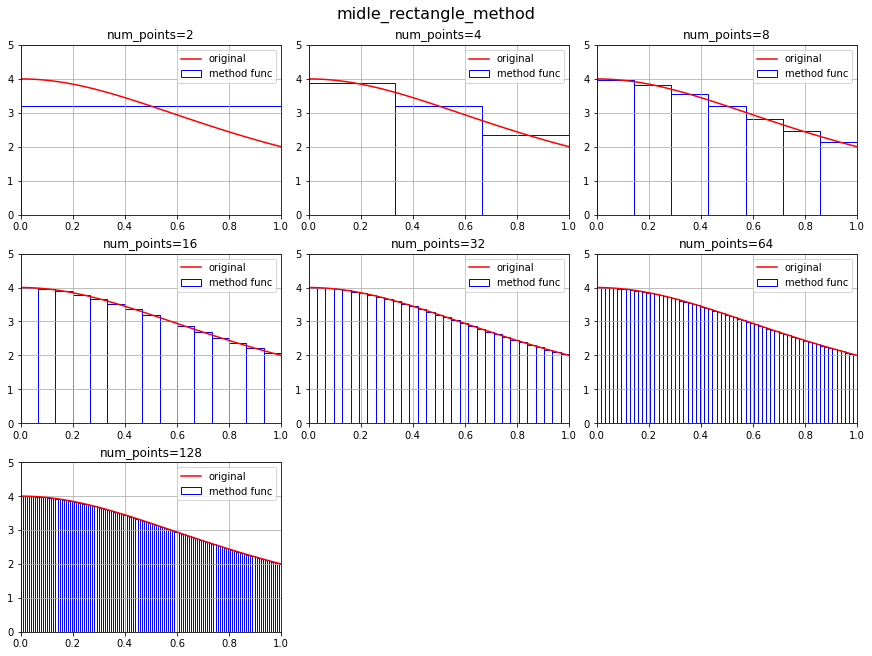

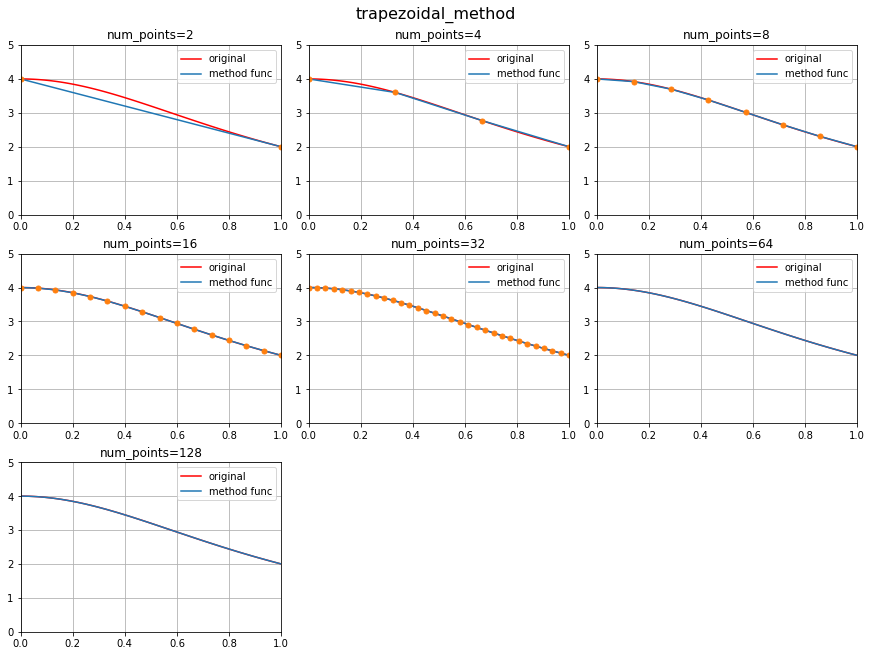

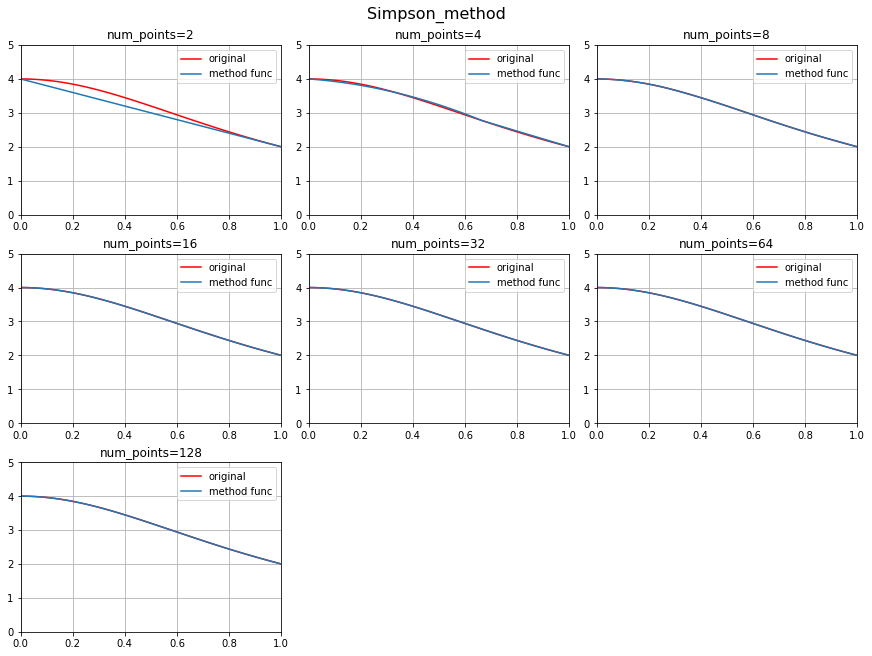

In [21]:
# инициализация
num_points = [2, 4, 8, 16, 32, 64, 128]
x = [np.linspace(0, 1, i) for i in num_points]
funcs = [midle_rectangle_method, trapezoidal_method, Simpson_method]

# вычисление
tab_eps = { f.__name__ + "_eps/difference" : [f(integrate_func, i)[1] for i in x] for f in funcs}
tab_eps["points"] = num_points

formatter_f =  "{0:.6f}"
formatter_s =  "{0:.2f}"
for f in funcs:
    difference = []
    tmp_eps = tab_eps[f.__name__ + "_eps/difference"]
    difference.append((formatter_f.format(tmp_eps[0]), "-"))
    for i in range(1,len(tmp_eps)):
        difference.append((formatter_f.format(tmp_eps[i]), formatter_s.format(tmp_eps[i-1] / tmp_eps[i])))
    tab_eps[f.__name__ + "_eps/difference"] = difference

tab_res = { f.__name__ + "_res" : [f(integrate_func, i)[0] for i in x] for f in funcs}
tab_res["points"] = num_points

# табулирование
display(pd.DataFrame(tab_eps))
print("Таблица с погрешностями")
display(pd.DataFrame(tab_res))
print("Таблица с результатами")

#отрисовка функций
tab_funcs = { f.__name__ : [f(integrate_func, i)[2] for i in x] for f in funcs}

figsize = (12, 9)
cols = 3
rows = len(num_points) // cols + 1
for f_name in tab_funcs.keys():
    fig, axs1 = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
    fig.suptitle(f_name, fontsize=16)
    axs1 = trim_axs(axs1, len(x))
    for ax, case, x_y in zip(axs1, num_points, tab_funcs[f_name]):
        ax.set_title('num_points=%s' % str(case))
        ax.axis(xmin=0,xmax=1,ymin=0, ymax=5)
        ax.plot(np.linspace(0, 1, 100), integrate_func(np.linspace(0, 1, 100)), label='original',  color="red")
        if f_name == "midle_rectangle_method":
            ax.bar(x_y[1], x_y[0], label='method func', width=1./(case - 1) , 
                   align="edge", edgecolor = "blue", fill=False,
                  )            
        else:
            ax.plot(x_y[1], x_y[0], label='method func')
        if f_name != "trapezoidal_method" or case == 128 or case == 64:
            pass
        else:
            ax.plot(x_y[1], x_y[0],'o', markersize=5, label='points')
        ax.legend(['original', 'method func'])
        ax.grid()

Рассмотрим как меняется погрешность:
1) формула расчета для метода прямоугольников:
$$
\int _{a}^{b}f(x)\,dx\approx \sum _{{i=0}}^{{n-1}}f\left({\frac  {x_{i}+x_{{i+1}}}{2}}\right)(x_{{i+1}}-x_{i})=\sum _{{i=1}}^{n}f\left({\frac  {x_{{i-1}}+x_{i}}{2}}\right)(x_{i}-x_{{i-1}}).
$$

Погрешность:
$$
{\displaystyle E(f)={\frac {f''(\xi )}{24}}(b-a)h^{2}.}
$$
Из формулы следует что если мы увеличим число узлов в 2 раза, то погрешность станет меньше в 4 раза, что можно наблюдать в таблице.

2) метод трапеций:
$$
\int _{a}^{b}f(x)\,dx\approx \sum _{{i=0}}^{{n-1}}{\frac  {f(x_{i})+f(x_{{i+1}})}{2}}(x_{{i+1}}-x_{{i}}).
$$

Погрешность метода:
$$
E_{n}(f)=-{\frac  {f''(\xi )}{12}}(b-a)h^{2}.
$$
Изменение погрешности так же можно увидеть из таблицы.

3) метод Симпсона:
Для этого метода необходимо делить отрезок на четное кол-во отрезков равной длины (чтобы получить большую точность)

$$
{\displaystyle \int _{a}^{b}f(x)\,dx\approx {\frac {h}{3}}\left[f(x_{0})+2\sum _{j=1}^{N/2-1}f(x_{2j})+4\sum _{j=1}^{N/2}f(x_{2j-1})+f(x_{N})\right]}=
{\frac  {h}{3}}{\bigg [}f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+\cdots +4f(x_{{N-1}})+f(x_{N}){\bigg ]}.
$$
Метод основан на приближении подинтегральной функции параболой - т.е. на каждом отрезке интыгрирования строится приближающая парабола.


Погрешность - если кол-во отрезков четное:
$$
\left|E(f)\right|\leqslant {\frac  {(b-a)}{2880}}h^{4}\max \limits _{{x\in [a,b]}}|f^{{(4)}}(x)|
$$

Соответсвенно погрешность должа уменьшеаться в 16 раз, однако из таблицы можно увидеть что она уменьшается всего в 2 раза - все потому, что у нас четное кол-во узлов, а следовательно нечетное кол-во отрезков.

Посмотрим, что будет если сделать нечетное кол-во узлов

[2, 4, 8, 16, 32, 64, 128]


,Simpson_method_eps/difference,points
0,"(0.008259, -)",2
1,"(0.000024, 343.76)",4
2,"(0.000000, 158.98)",8
3,"(0.000000, 63.90)",16
4,"(0.000000, 63.99)",32
5,"(0.000000, 64.01)",64
6,"(0.000000, 65.00)",128


Таблица с погрешностями


,Simpson_method_res,points
0,3.133333,2
1,3.141569,4
2,3.141593,8
3,3.141593,16
4,3.141593,32
5,3.141593,64
6,3.141593,128


Таблица с результатами


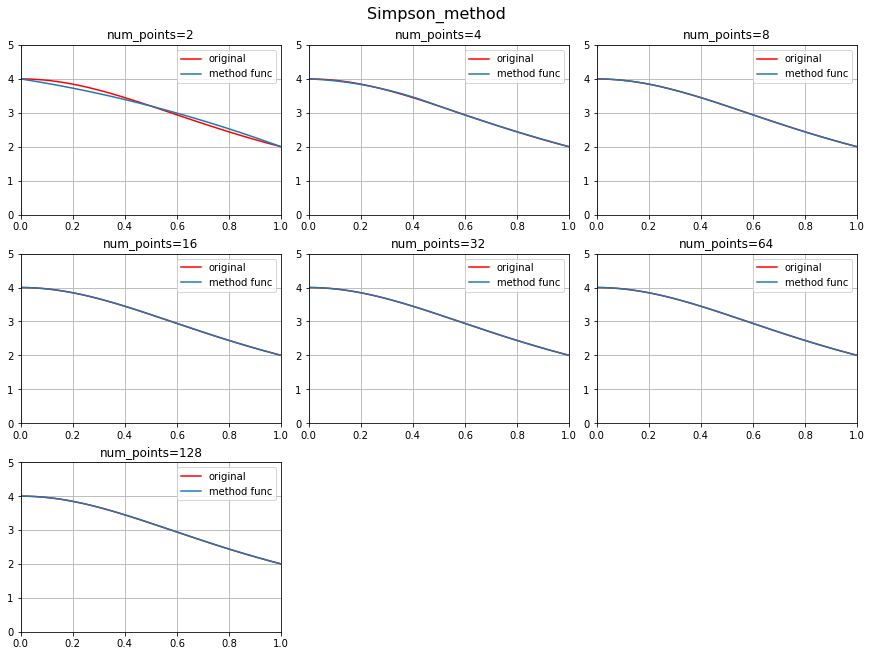

In [22]:
# инициализация
num_points = [2, 4, 8, 16, 32, 64, 128]
print(num_points)
x = [np.linspace(0, 1, i + 1) for i in num_points]
funcs = [ Simpson_method]

# вычисление
tab_eps = { f.__name__ + "_eps/difference" : [f(integrate_func, i)[1] for i in x] for f in funcs}
tab_eps["points"] = num_points

formatter_f =  "{0:.6f}"
formatter_s =  "{0:.2f}"
for f in funcs:
    difference = []
    tmp_eps = tab_eps[f.__name__ + "_eps/difference"]
    difference.append((formatter_f.format(tmp_eps[0]), "-"))
    for i in range(1,len(tmp_eps)):
        difference.append((formatter_f.format(tmp_eps[i]), formatter_s.format(tmp_eps[i-1] / tmp_eps[i])))
    tab_eps[f.__name__ + "_eps/difference"] = difference

tab_res = { f.__name__ + "_res" : [f(integrate_func, i)[0] for i in x] for f in funcs}
tab_res["points"] = num_points

# табулирование
display(pd.DataFrame(tab_eps))
print("Таблица с погрешностями")
display(pd.DataFrame(tab_res))
print("Таблица с результатами")

#отрисовка функций
tab_funcs = { f.__name__ : [f(integrate_func, i)[2] for i in x] for f in funcs}

figsize = (12, 9)
cols = 3
rows = len(num_points) // cols + 1
for f_name in tab_funcs.keys():
    fig, axs1 = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
    fig.suptitle(f_name, fontsize=16)
    axs1 = trim_axs(axs1, len(x))
    for ax, case, x_y in zip(axs1, num_points, tab_funcs[f_name]):
        ax.set_title('num_points=%s' % str(case))
        ax.axis(xmin=0,xmax=1,ymin=0, ymax=5)
        ax.plot(np.linspace(0, 1, 100), integrate_func(np.linspace(0, 1, 100)), label='original',  color="red")
        if f_name == "midle_rectangle_method":
            ax.bar(x_y[1], x_y[0], label='method func', width=1./(case - 1) , 
                   align="edge", edgecolor = "blue", fill=False,
                  )            
        else:
            ax.plot(x_y[1], x_y[0], label='method func')
        if f_name != "trapezoidal_method" or case == 128 or case == 64:
            pass
        else:
            ax.plot(x_y[1], x_y[0],'o', markersize=5, label='points')
        ax.legend(['original', 'method func'])
        ax.grid()

Можно увидеть что погрешность уменьшается с гораздо большей скоростью.